In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1", "grad", "finished"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,nPop,error,time_minutes,1,2,3,4,5,6
0,20,6.192670,9.610649,197.089477,799.030731,1491.906246,1745.729501,2243.132952,3117.578034
1,25,6.344359,12.240765,190.410782,825.697931,1422.732853,1641.912928,2327.117949,3198.857177
2,30,5.362518,14.821516,195.053133,872.550338,1389.316181,1760.967996,2425.339091,3161.586405
3,35,6.040631,18.179628,192.608849,805.549345,1455.205787,1585.188746,2414.772834,3198.509138
4,40,4.976124,19.783173,200.851394,840.574237,1405.124002,1687.704412,2423.702483,3251.129979


In [3]:
data.describe()

,nPop,error,time_minutes,1,2,3,4,5,6
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,40.000000,5.618001,19.776588,196.074031,833.159727,1420.839193,1703.588830,2348.773410,3197.564675
std,13.055824,0.759380,6.840223,4.765434,30.291780,27.273436,51.436037,69.937323,35.650767
min,20.000000,4.066648,9.610649,186.406792,775.329313,1362.308488,1585.188746,2203.391983,3103.269589
25%,30.000000,5.184000,14.397336,191.458038,806.116252,1405.124002,1671.645970,2301.030442,3177.408761
50%,40.000000,5.486786,19.783173,197.089477,828.209507,1415.617417,1701.234576,2341.978372,3198.509138
75%,50.000000,6.159050,23.755501,200.185351,849.828382,1430.990318,1745.729501,2401.652310,3220.882014
max,60.000000,7.461207,37.393642,203.753077,942.157339,1493.045576,1794.120291,2482.182452,3263.347821


### Natural frequencies

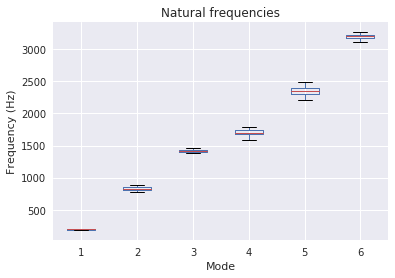

In [4]:
freq = data.drop(['error', 'time_minutes', 'nPop'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Grouping by population size

In [5]:
errors = data.drop(['time_minutes'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.groupby('nPop').describe()

error                                                              \
     count      mean       std       min       25%       50%       75%   
nPop                                                                     
20     5.0  6.252591  0.606193  5.547641  6.028466  6.192670  6.283381   
25     5.0  6.162373  0.323599  5.662989  6.010997  6.344359  6.354488   
30     5.0  5.845359  0.639620  5.295190  5.362518  5.486786  6.497534   
35     5.0  6.078720  0.869230  5.330851  5.349012  6.040631  6.211897   
40     5.0  5.418928  0.308957  4.976124  5.357261  5.397953  5.534251   
45     5.0  5.526545  0.504530  4.872536  5.184000  5.650227  5.766913   
50     5.0  5.369212  1.153927  4.677745  4.681348  4.790010  5.318551   
55     5.0  4.939462  0.535034  4.066648  4.799650  5.157314  5.322687   
60     5.0  4.968816  0.543267  4.249390  4.689730  4.995633  5.217730   

                
           max  
nPop            
20    7.210795  
25    6.439032  
30    6.584767  
35    7.461207  
40    5.829049  
45    6.159050  
50    7.378407  
55    5.351013  
60    5.691598

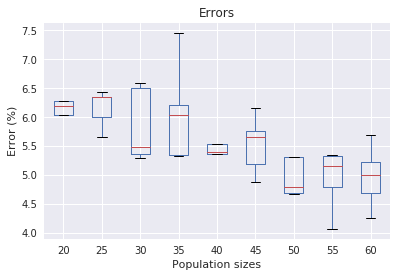

In [6]:
errors.boxplot(column='error', by='nPop')
plt.suptitle("")
plt.title("Errors")
plt.xlabel("Population sizes")
plt.ylabel("Error (%)")
plt.show()

In [7]:
times = data.drop(['error'], axis=1)
times.drop([x for x in times.columns if type(x)==int], axis=1, inplace=True)

times.groupby('nPop').describe()

time_minutes                                                        \
            count       mean       std        min        25%        50%   
nPop                                                                      
20            5.0  10.222517  0.550727   9.610649   9.655153  10.500810   
25            5.0  12.481175  0.808851  11.374973  12.240765  12.341023   
30            5.0  14.394370  0.355318  13.838141  14.397336  14.406447   
35            5.0  17.396793  1.048215  15.602918  17.353932  17.864560   
40            5.0  20.373961  2.600476  17.718611  18.280674  19.783173   
45            5.0  21.335691  1.150152  20.057379  20.974201  21.117145   
50            5.0  22.955083  0.696781  22.175485  22.359724  22.975482   
55            5.0  28.740156  3.252859  25.840239  26.801337  28.222953   
60            5.0  30.089547  4.464349  26.287541  26.707326  29.544844   

                            
            75%        max  
nPop                        
20    10.543326  10.802648  
25    12.900056  13.549059  
30    14.508411  14.821516  
35    17.982928  18.179628  
40    22.331848  23.755501  
45    21.328877  23.200854  
50    23.456354  23.808372  
55    28.630181  34.206071  
60    30.514381  37.393642

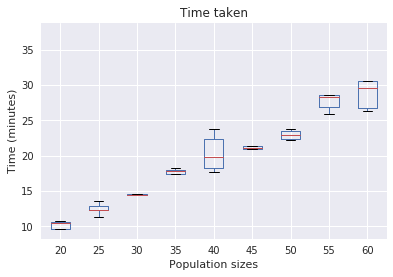

In [8]:
times.boxplot(column='time_minutes', by='nPop')
plt.suptitle("")
plt.title("Time taken")
plt.xlabel("Population sizes")
plt.ylabel("Time (minutes)")
plt.show()